# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
#columns we care about
race_call = data[['race', 'call']]

In [7]:
race_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


# What test is appropriate for this problem? Does CLT apply?

Because of the sample size and the topic we focus on, twe-sample z-test would be the best choice for this problem

### Explore Data

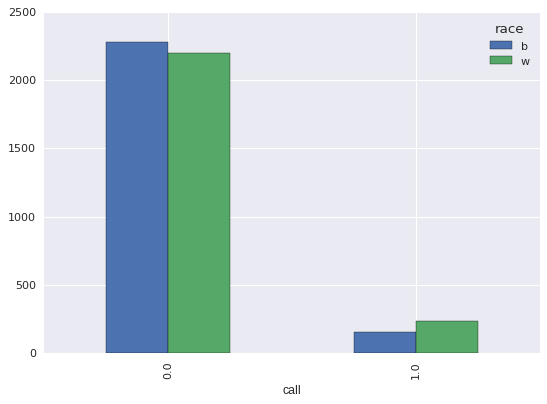

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
_ = race_call.groupby(['call', 'race']).size().unstack().plot(kind='bar')

#### It seems no big difference for each race group, let's make some test

#  Null and alternate hypotheses?

## Hypothesis test
* $H_0$ : $P_w - P_b = 0$
* $H_1$ : $P_w - P_b \neq 0$

#### Before starting test, calculate parameters for further use

In [16]:
mu1 = np.mean(race_call[race_call.race == 'w'].call)
mu2 = np.mean(race_call[race_call.race == 'b'].call)
mu = mu1 - mu2
n1 = len(race_call[race_call.race == 'w'])
n2 = len(race_call[race_call.race == 'b'])
sigma1 = mu1*(1-mu1)/n1
sigma2 = mu2*(1-mu2)/n2
sigma = np.sqrt(sigma1 + sigma2)
print("Difference of call means between white-sounding and black-sounding names: {:.5f}".format(mu))
print("Standard deviaof: {:.5f}".format(sigma))

Difference of call means between white-sounding and black-sounding names: 0.03203
Standard deviaof: 0.00778


In [18]:
z = (mu - 0)/sigma
print("z-statistic: {:.5f}".format(z))

z-statistic: 4.11555


In [20]:
alpha = 0.05
z_alpha = 1.96 #for 95% confidence interval

Since z score of data is larger than z score at 0.05 significance interval, $H_0$ would be rejected.

It indicates white-sounding names are more likely to receive calls from recruiters.

# Compute margin of error, confidence interval, and p-value.

In [21]:
mu + z_alpha * sigma, mu - z_alpha * sigma

(0.047288261203744901, 0.016777448506376254)

We are 95% confident that while-sounding people are more likely to receive a call than black-sounding people. But since the difference is so small (which may because of other source of reasons) that we cannot be very sure if it just happen by chance.

Now calculate p-value to see if the results due to chance

In [22]:
z_score = (mu - 0)/sigma
p_values = stats.norm.sf(abs(z_score)) * 2
print("p_value: {:.6f}".format(p_values))

p_value: 0.000039


The p-value here is way less than the threshold 0.05, which means the null hypothesis do not happen by chance. Hence, it is safe to say white-sounding names are more likely to receive calls from recruiters.

# Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Although we have proved that white-sounding names do have a little higher probability to receive calls from recruiters, the difference between two groups of people are so small that even could be ignored. Therefore, according to my analysis, race/name is definitely not the most important factor in callback success (even not a important factor). 

To further analyzing this problem, I'd like to compare columns to find out which factors are the most important ones in callback success. Machine learning algorithms may also be applied to build predictive models and check performances of features.